# 1 Problem outline

This project will deal with tring to predict the increase in resale HDB prices. HDBs in Singapore are nothing but public housing sold by the government to the people at steep discounts with subsidies, however such houses come with certain interesting rules that are designed to keep the price of such housing affordable to the general population. Interestingly enough 5 years after such public housing is sold directly by the government to the public, the public owners are then themselves allowed to sell the house on the private market, however during such a sale there are no restrictions placed on how the house can be sold and the owners are then allowed to quote prices at or slightly above market price to sellers. This has in turn lead to rising prices that have dented the affordability of public housing and lead to much public outcry, the new emergence of "million dollar HDBs" which are HDBs sold for upwards of a million dollars have become increasingly frequent and stand as an oxymoron to cheap public housing. 

## Impact and contribution to domain specific area

Analyzing Singapore HDB resale prices is crucial for both individuals and the country as a whole. At the individual level, understanding the trends and factors influencing resale prices aids prospective homebuyers and sellers in making informed decisions regarding property transactions. It enables them to gauge the market dynamics, assess property values, and strategically plan their investments or sales. On a broader scale, the analysis of HDB resale prices serves as a vital economic indicator for the nation. The housing market is intricately linked to the overall economic health, reflecting factors such as consumer confidence, inflation rates, and demographic changes. Policymakers can leverage insights from these analyses to formulate housing policies, address affordability concerns, and promote sustainable urban development. Moreover, a stable and affordable housing market contributes to social stability and citizen well-being, aligning with the broader goals of Singapore's urban planning and development initiatives. Therefore, delving into the intricacies of HDB resale prices is not only practical for individuals navigating the property market but also pivotal for shaping effective national policies and fostering a resilient and thriving community.

## Project Aim
The aim of this project is to observe through current trends and features such as the location and neighbourhood of the house and many other such features if the price of public housing will continue to rise, if it will rise at all whilst accounting for inflation. This will be done through a machine learning model that will account for some of these features after the relevance of these fetures have been determined. I will also be doing a statistical analysis of all these features in order to observe how they could impact the machine learning model and how relevant they are to our analysis. This will later help in determining which were the most important features for our model and help us in removing unwanted variables as well as outliers that may negatively impact our machine learning model. In the conclusion in which I will try to suggest the features that have the maximum effect on pushing housing prices up or down and how these features can be tweaked in order to flatten the rise in public housing prices, should the model continue to predict an upward trend. 

# 2 The dataset

For this project the dataset we will be using will be coming directly from the government all such data can be found on data.gov.sg,We will be using multiple datasets detailing different things in order to ensure that our machine learning model is as well rounded as possible. These data sets include.

1. Sales data of housing from 1990-2023( comes in the form of 5 CSV files)
2. CPI (core public inflation data)( 1 CSV file)


The challenge with these datasets would be to combine them into a dataframe or multiple dataframes in 1NF in order to use them meaningfully to build our machine learning model. This will be quite tricky as each dataset may have different headers and even if they did have the same headers the content they are describing could be the same but implemented differently.
Dataset is from: 
1. https://beta.data.gov.sg/collections/189/view
2. https://beta.data.gov.sg/collections/791/view

## 2.1 Challenges expected with the dataset

1. Sales data from 1990-2023 comes in the form of 5 CSV files, each of these CSV files were compiled over different periods of time and contain different headings, for example only data recorded from 2017 onwards contains the heading "remaining lease" data before does not contain this heading.Combining these datasets and ensuring there are no missing data will be one of the challenges.
2. CPI data has spaces associated with the back of the dates and need to be sorted out in order to use inflation data to account for price increases.

#  3 Importing and merging data

For preprocessing, we would use the following libaries under their standard aliases. Additional
libraries would be added in progress of the data processing.

In [371]:
!pip install jinja2==3.0.3
!pip install pandoc
!pip install notebook-as-pdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

I now import and load multiple datasets related to Housing and Development Board (HDB) resale flat prices in Singapore, spanning different time periods. The datasets include sales data from 1990 to 1999, 2000 to 2012, 2012 to 2014, 2014 to 2016, and from January 2017 onwards. Each dataset likely contains information such as transaction details, flat prices, and other relevant attributes for HDB resale flats during the specified time ranges. Additionally, I am importing the Consumer Price Index (CPI) data, which serves as a measure of inflation, covering all months from 1990 to 2023. The CPI data is crucial for adjusting resale flat prices over time to account for inflation, providing a more accurate analysis of the real value of these transactions. The goal here is to perform a comprehensive analysis of HDB resale prices, considering inflationary effects and understanding how property values have evolved over the specified periods.

In [329]:
#Importing resale data
sales1990to1999 = pd.read_csv('./ResaleFlatPricesBasedonApprovalDate19901999.csv')# data for all HDB resale sales from 1990 to 1999
sales2000to2012 = pd.read_csv('./ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')#data for all HDB resale sales from 2000 to 2012
sales2012to2014 = pd.read_csv('./ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')#data for all HDB resale sales from 2012 to 2014
sales2014to2016 = pd.read_csv('./ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')#data for all HDB resale sales from 2015 to 2016
sales2017Onward = pd.read_csv('./ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')#data for all HDB resale sales from 2017 to 2023
cpi = pd.read_csv('./cpi.csv')# inflation data for all months from 1990 to 2023

In [3]:
sales1990to1999.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [4]:
sales2000to2012.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [5]:
sales2012to2014.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [6]:
sales2014to2016.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [7]:
sales2017Onward.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


Looking at the datasets, it can be noticed that the all of the datasets except the dataset sales2014to2016 and sales2017Onward have 10 columns, the reason for this is the fact that these two datasets in particular have an additional column "remaining_lease". So it is important to take note of this when combining the datasets and doing data cleaning.

In [330]:
# Merge dfs
sales = pd.concat([sales1990to1999, sales2000to2012, sales2012to2014], sort=False)
sales = pd.concat([sales, sales2014to2016, sales2017Onward], axis=0, ignore_index=True, sort=False)

sales['month'] = pd.to_datetime(sales['month']) # to datetime

#Analyse data
sales.describe()
sales.info()
sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913861 entries, 0 to 913860
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                913861 non-null  datetime64[ns]
 1   town                 913861 non-null  object        
 2   flat_type            913861 non-null  object        
 3   block                913861 non-null  object        
 4   street_name          913861 non-null  object        
 5   storey_range         913861 non-null  object        
 6   floor_area_sqm       913861 non-null  float64       
 7   flat_model           913861 non-null  object        
 8   lease_commence_date  913861 non-null  int64         
 9   resale_price         913861 non-null  float64       
 10  remaining_lease      204811 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 76.7+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


The combined dataset has a total of 10 columns and 913861 non null entries in all columns except for the reamining lease column

In [331]:
#Converting object datatype to category datatype
columns_to_convert = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']

# Convert object columns to category data type
for column in columns_to_convert:
    sales[column] = sales[column].astype('category')

# Display the updated data types
print(sales.dtypes)

month                  datetime64[ns]
town                         category
flat_type                    category
block                        category
street_name                  category
storey_range                 category
floor_area_sqm                float64
flat_model                   category
lease_commence_date             int64
resale_price                  float64
remaining_lease                object
dtype: object


The object data type serves as a catch-all for information that does not fit into the other data types. Although object data has a great deal of flexibility, it can also be slower and consume more memory than categorical data of the same size and can't be subjected to some of the specialized operations that are possible with category data. For this reason we will be converting all object data types with the exception of remaining_lease to category data type.

In [281]:
sales[sales.isnull().any(axis=1)]['month'].dt.year.unique()# to find all the years with null values

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014], dtype=int64)

It can be observed here that the years 2015 to 2023 are not included in this array, upon closer inspection and observing the above data which describes the dataset, an interesting discrepancy can be found, all columns of the dataframe have a non null count of 913861 with the exception of the remaining_lease column. The reason for this is the fact that the remaining lease column is a new column introduced in the year 2015, as a result only data sets that were produced after 2015 have this information. In order to compensate for this lack of information we will use the lease_commencement_date column as it serves as a sufficent proxy and can tel us the remaining lease when subtracted from the current date. To fix such discrepancies I will begin cleaning the data.

# 4 Data Cleaning

In [332]:
#cleaning remaining lease to make sure it does not contain null values, all HDBs have a maximum of 99 years of lease so the remaing lease is calculated from the lease start
year = dt.now().year
# code for dates before 2000
sales.loc[(sales.remaining_lease.isna()) & (sales.lease_commence_date<2000),'remaining_lease']=99-(2000-sales.lease_commence_date+(year-2000))
#code for dates after 2000
sales.loc[(sales.remaining_lease.isna()) & (sales.lease_commence_date>=2000),'remaining_lease']=99-(year-sales.lease_commence_date)

def getYears(text):
    if isinstance(text, str):
        yearmonth = [int(s) for s in text.split() if s.isdigit()]
        if len(yearmonth) > 1: # if there's year and month
            years = yearmonth[0] + (yearmonth[1]/12)
        else: # if only year
            years = yearmonth[0]
        return years
    else: # if int
        return text

sales['remaining_lease'] = sales['remaining_lease'].apply(lambda x: getYears(x))

sales.head() # checking to see valididty of code
display(sales)# checking to see valididty of code
# Display the updated data types
print(sales.dtypes)
sales['remaining_lease'].isna().sum() # checking to see if there are any null values

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,52.000000
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,52.000000
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,52.000000
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,52.000000
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,51.000000
...,...,...,...,...,...,...,...,...,...,...,...
913856,2023-05-01,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,855000.0,63.500000
913857,2023-07-01,YISHUN,EXECUTIVE,837,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,860000.0,63.583333
913858,2023-12-01,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,780000.0,63.166667
913859,2023-01-01,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,1080000.0,63.916667


month                  datetime64[ns]
town                         category
flat_type                    category
block                        category
street_name                  category
storey_range                 category
floor_area_sqm                float64
flat_model                   category
lease_commence_date             int64
resale_price                  float64
remaining_lease               float64
dtype: object


0

Using the above code I have utilised the lease commencement date in order to determining the remaining lease of all the rows, in this way we have eliminated all null values present in the remaining_lease column

In [69]:
sales['flat_type'].unique()# finding all the unique entries in the flat type column

['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', 'MULTI GENERATION', 'MULTI-GENERATION']
Categories (8, object): ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI GENERATION', 'MULTI-GENERATION']

MULTI GENARATION is repeated twice

In [70]:
sales['town'].unique()# finding all the unique entries in the flat type column

['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH', ..., 'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS', 'PUNGGOL']
Length: 27
Categories (27, object): ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', ..., 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN']

No discrepancies found in the town column

In [71]:
# finding all the unique entries in the flat type column and showing their counts, multiple repetitions can be found
sales['flat_model'].value_counts()

Model A                   189435
Improved                  165098
New Generation            108518
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          45453
Simplified                 33829
Apartment                  25174
Standard                   24871
SIMPLIFIED                 23258
STANDARD                   17375
Maisonette                 17112
MAISONETTE                 12215
Model A2                    9991
APARTMENT                   9901
DBSS                        3169
Adjoined flat               1231
Model A-Maisonette          1073
MODEL A-MAISONETTE           982
Terrace                      441
Type S1                      428
MULTI GENERATION             279
Multi Generation             259
TERRACE                      247
Type S2                      210
Premium Apartment Loft       103
Premium Maisonette            86
2-room                        82
Improved-Maisonette           81
IMPROVED-M

Multiple repetitions of values such as MODEL A-MAISONETTE and 2-ROOM all will be standardised to capital letters

In [333]:

#Clean flat type
sales['flat_type'] = sales['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')
sales['flat_type'].unique()

#clean flat_model
replace_values = {'New Generation':'NEW GENERATION', 'SIMPLIFIED':'Simplified', 'STANDARD':'Standard', 'MODEL A-MAISONETTE':'Maisonette', 'MULTI GENERATION':'Multi Generation', 'IMPROVED-MAISONETTE':'Executive Maisonette', 'Improved-Maisonette':'Executive Maisonette', 'Premium Maisonette':'Executive Maisonette', '2-ROOM':'2-room', 'MODEL A':'Model A', 'MAISONETTE':'Maisonette', 'Model A-Maisonette':'Maisonette', 'IMPROVED':'Improved', 'TERRACE':'Terrace', 'PREMIUM APARTMENT':'Premium Apartment', 'Premium Apartment Loft':'Premium Apartment', 'APARTMENT':'Apartment', 'Type S1':'Type S1S2', 'Type S2':'Type S1S2'}

sales = sales.replace({'flat_model': replace_values})

sales['flat_model'].value_counts()

Model A                 259816
Improved                238687
NEW GENERATION          187416
Simplified               57087
Premium Apartment        45562
Standard                 42246
Apartment                35075
Maisonette               31382
Model A2                  9991
DBSS                      3169
Adjoined flat             1231
Terrace                    688
Type S1S2                  638
Multi Generation           538
Executive Maisonette       211
2-room                     103
3Gen                        21
Name: flat_model, dtype: int64

Types of Flat Models:

1. <strong> Standard</strong>: (1/2/3/4/5-room). 1960s HDB. Had WC and shower in same room. 5-room Standard were introduced in 1974.
2. <strong>Improved</strong>: (1/2/3/4/5-room). Introduced in 1966, the 3/4-room having separate WC and shower, they also featured void decks. 5-room Improved were introduced in 1974.
3. <strong>New Generation</strong>: Started first in 1975, New Generation flats can be 3-Room (67 / 82 sqm) or 4-Room (92 sqm), featuring en-suite toilet for master bedroom, with pedestal type Water Closet, plus store room.
4. <strong>Model A</strong>: Introduced in 1981: 3-Room (75 sqm), 4-Room (105 sqm), 5-Room (135 sqm), 5-Room Maisonette (139 sqm)
5. <strong>Model A2</strong>: Smaller units of Model A. e.g., 4-Room Model A2 (90 sqm)
6. <strong>Simplified</strong>: Introduced in 1984: 3-Room (64 sqm), 4-Room (84 sqm)
7. <strong>Multi Generation</strong>: 3Gen flats designed to meet the needs of multi-generation families.
8. <strong>Maisonette</strong>: AKA Model A Maisonette — 2 storeys HDB flat
9. <strong>Premium Apartment</strong>: Introduced somewhere during 1990s, featuring better quality finishes, you get them in ready-to-move condition, with flooring, kitchen cabinets, built-in wardrobes
10. <strong>Executive Maisonette</strong>: More premium version of Model A Maisonettes. These units are no longer being built after being replaced by the Executive Condominium (EC) scheme in 1995
11. <strong>Executive Apartment</strong>: Executive Apartment / Maisonette (146-150 sqm) were introduced in 1983 and replaced 5-Room Model A flats, in addition of the 3-bedroom and separate living/dining found in 5A flats, EA and EM feature an utility/maid room. 80% of Executive units were Maisonettes and 20% were Apartments.
12. <strong>DBBS</strong>: public apartments built under the HDB's short-lived Design, Build and Sell Scheme (DBSS) from 2005 to 2012. They are a unique (and premium) breed of HDB flats in Singapore, which are built by private developers. High Prices. Quite similiar to Executive Condominium except DBBS is like a premium HDB without facilities of private condos
13. <strong>Adjoined Flat</strong>: Large HDB flats which are combined from 2 HDB flats
14. <strong>Terrace</strong>: HDB terrace flats built before HDB, without realizing Singapore's land constraint. Discontinued
15. <strong>Type S1S2</strong>: apartments at The Pinnacle@Duxton are classified as "S" or Special apartments in view of its historical significance and award-winning design. For application of HDB policies, S1 and S2 apartments will be treated as 4-room and 5-room flats respectively
16. <strong>2-room</strong>: Most likely refers to 2-room flexi where there is 1 bedroom and 1 common area

In [334]:
# Compute Resale Price Adjusted for Inflation Using Consumer Price Index for Housing & Utilities
cpi = pd.read_csv('./CPI(1).csv')
cpi['month'] = pd.to_datetime(cpi['month'], format='%Y %b') # to datetime
sales = sales.merge(cpi, on='month', how='left') 
sales['real_price'] = (sales['resale_price'] / sales['cpi']) * 100 
sales.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,cpi,real_price
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,52.0,60.894,14779.781259
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,52.0,60.894,9853.187506
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,52.0,60.894,13137.583342
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,52.0,60.894,9853.187506
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,51.0,60.894,77511.741715


I use the CPI data from the CPI dataframe and merge it with the sales dataframe in order to create one unified dataframe with all the required data in it. In this way I have ensured that my dataset is in 1NF.

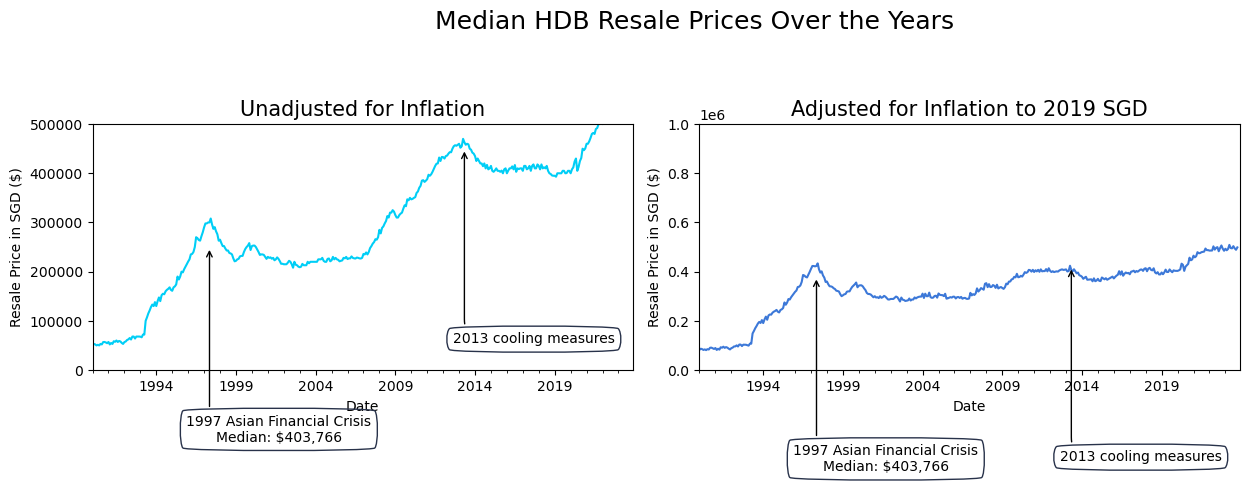

In [335]:
# Plot Median Resale Prices Over the Years

# Unadjusted
fig = plt.figure(figsize=(14,4.5))
fig.suptitle('Median HDB Resale Prices Over the Years', fontsize=18)
ax1 = fig.add_subplot(121)
sales.groupby('month')[['resale_price']].median().plot(ax=ax1, color='#00cef6', legend=None)
ax1.set_xlabel('Date'), ax1.set_ylabel('Resale Price in SGD ($)'), ax1.set_ylim(0, 500000), ax1.set_title('Unadjusted for Inflation', size=15)
ax1.annotate('1997 Asian Financial Crisis\nMedian: $403,766', xy=('1997-05-01',250000), xycoords='data', 
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(50,-140), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))
ax1.annotate('2013 cooling measures', xy=('2013-05-01',450000), xycoords='data', 
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(50,-140), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))
# Adjusted
# https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html
ax2 = fig.add_subplot(122)
sales.groupby('month')[['real_price']].median().plot(ax=ax2, color='#3c78d8', legend=None)
ax2.set_xlabel('Date'), ax2.set_ylabel('Resale Price in SGD ($)'), ax2.set_ylim(0, 1000000), ax2.set_title('Adjusted for Inflation to 2019 SGD',size=15)
ax2.annotate('1997 Asian Financial Crisis\nMedian: $403,766', xy=('1997-05-01',380000), xycoords='data', 
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(50,-140), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))
ax2.annotate('2013 cooling measures', xy=('2013-05-01',420000), xycoords='data', 
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(50,-140), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))
plt.tight_layout(rect=[0, 0, 0.9, 0.9]) 
plt.show()


As we can see from the above two graphs the inflation adjusted price does not show changes in price that are nearly as dramatic as the non inflation adjusted price, however in both graphs two important price trends can be observed, the first is the sharp decline in prices during the asian financial crisis and the other another less sharper decline around 2013, this decline coincides with the government introducing tighter restrictions around the total loan amount an individual was allowed to obtain from the bank to finance a house, these restrictions have been in place to the present day and data obtained over this period will be more reflective of price trends than data obtained before this period.

# 5 Exploratory data analysis

## 5.1 Statistical analysis

In [46]:
# Descriptive statistics
description = sales.describe()

# Correlation matrix
correlation_matrix = sales.corr()

# Display the results
print("Descriptive Statistics:")
print(description)

Descriptive Statistics:
       floor_area_sqm  lease_commence_date  resale_price  remaining_lease  \
count   913861.000000        913861.000000  9.138610e+05    913861.000000   
mean        95.697913          1988.130991  3.168002e+05        64.162376   
std         25.851537            10.513015  1.670358e+05        11.272212   
min         28.000000          1966.000000  5.000000e+03        41.000000   
25%         73.000000          1981.000000  1.910000e+05        56.416667   
50%         93.000000          1986.000000  2.940000e+05        62.000000   
75%        113.000000          1996.000000  4.120000e+05        71.000000   
max        307.000000          2022.000000  1.500000e+06        97.750000   

                 cpi    real_price  
count  911231.000000  9.112310e+05  
mean       84.563582  3.622059e+05  
std        15.394552  1.590354e+05  
min        60.894000  8.003073e+03  
25%        73.080000  2.513378e+05  
50%        76.068000  3.447665e+05  
75%       100.332000  4


Here are the summarized findings based on the descriptive statistics for the key variables in the sales DataFrame:

1. <strong>Floor Area (sqm):</strong>

The average floor area of HDB resale flats is approximately 95.70 square meters.
The floor area ranges from a minimum of 28 square meters to a maximum of 307 square meters.
The standard deviation is 25.85, indicating a moderate amount of variability in floor areas.

2. <strong>Lease Commencement Date:</strong>

The average lease commencement date is around 1988.13, suggesting that, on average, the flats in the dataset were built in the late 1980s.
The earliest lease commencement date is in 1966, while the latest is in 2022.

3. <strong>Resale Price:</strong>

The average resale price of HDB flats is approximately SGD 316,800.
Resale prices range from a minimum of SGD 8,000 to a maximum of SGD 1,500,000.
The standard deviation is 167,036, indicating a significant variability in resale prices.

4. <strong>Remaining Lease:</strong>

The average remaining lease duration is approximately 64.16 years.
The remaining lease ranges from a minimum of 41 years to a maximum of 97.75 years.
The standard deviation is 11.27, indicating variability in remaining lease durations.

5. <strong>Consumer Price Index (CPI):</strong>

The average CPI is around 84.56, representing the relative price level compared to a reference year.
The CPI values range from a minimum of 60.89 to a maximum of 114.81.
The standard deviation is 15.39, indicating variability in the CPI.

6. <strong> Real Price (Adjusted for Inflation):</strong>

The average real resale price, adjusted for inflation, is approximately SGD 362,206.
Real resale prices range from a minimum of SGD 8,003 to a maximum of SGD 1,349,164.
The standard deviation is 159,035, indicating variability in real resale prices.
These findings provide insights into the distribution and variability of key variables related to HDB resale flats in the dataset. The average values and standard deviations help understand the central tendency and spread of the data.


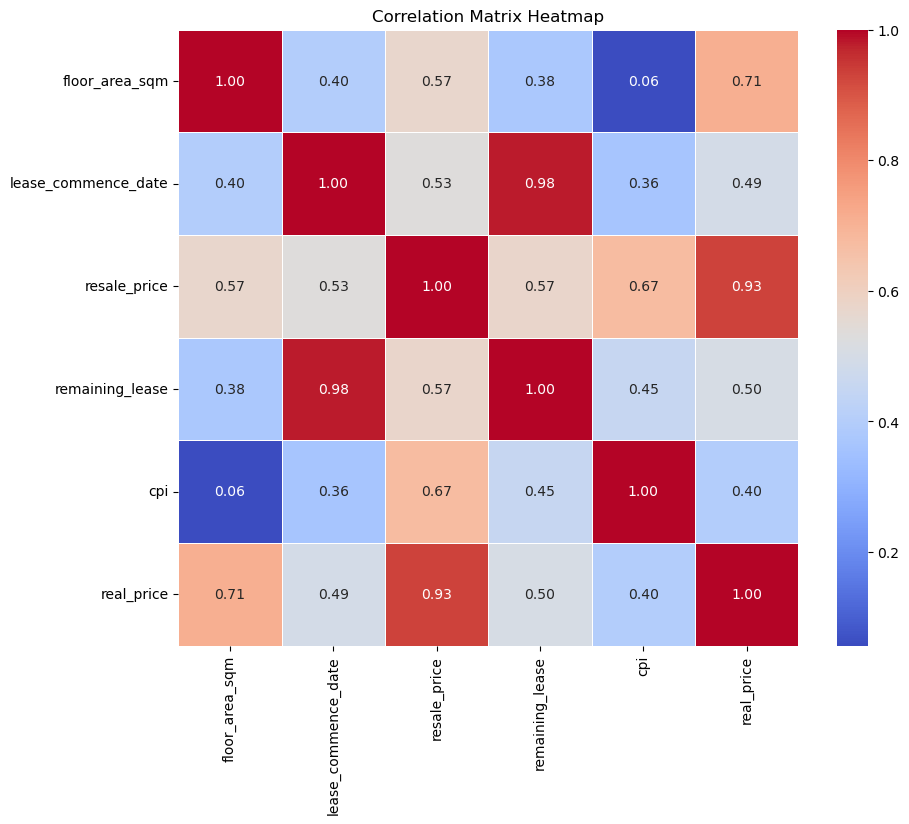

In [49]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Set the title of the plot
plt.title('Correlation Matrix Heatmap')

# Display the plot
plt.show()

The correlation matrix provides insights into the relationships between different variables in the sales DataFrame. Here are the summarized findings:

<strong>Floor Area (sqm):</strong>

Positively correlated with resale price (0.57) and real price (0.71).
Weak positive correlation with lease commencement date (0.40) and remaining lease (0.38).
Weak positive correlation with CPI (0.06).

<strong>Lease Commencement Date:</strong>

Positively correlated with remaining lease (0.98) and resale price (0.53).
Weak positive correlation with floor area (0.40) and real price (0.49).
Weak positive correlation with CPI (0.36).

<strong>Resale Price:

Strong positive correlation with real price (0.93).
Positively correlated with floor area (0.57), lease commencement date (0.53), and remaining lease (0.57).
Positively correlated with CPI (0.67).

<strong>Remaining Lease:</strong>

Positively correlated with lease commencement date (0.98) and resale price (0.57).
Weak positive correlation with floor area (0.38) and real price (0.50).
Weak positive correlation with CPI (0.45).

<strong>Consumer Price Index (CPI):</strong>

Positively correlated with resale price (0.67) and weakly correlated with other variables.
Weak positive correlation with floor area (0.06), lease commencement date (0.36), remaining lease (0.45), and real price (0.40).

<strong>Real Price (Adjusted for Inflation):</strong>

Strong positive correlation with resale price (0.93).
Positively correlated with floor area (0.71), lease commencement date (0.49), and remaining lease (0.50).
Positively correlated with CPI (0.40).

<strong>Overall Observations:</strong>

Resale price and real price exhibit a strong positive correlation, indicating that the inflation-adjusted resale prices closely follow the nominal resale prices.
Floor area has a moderate positive correlation with resale price and a strong positive correlation with real price, suggesting larger flats tend to have higher prices.
Lease-related variables (lease commencement date and remaining lease) are positively correlated with resale and real prices, indicating their impact on housing prices.
CPI shows a positive correlation with resale and real prices, reflecting the influence of inflation on housing prices.
These correlations provide insights into the interdependence of variables, aiding in understanding patterns and potential factors influencing HDB resale prices.

## 5.2 Flat type

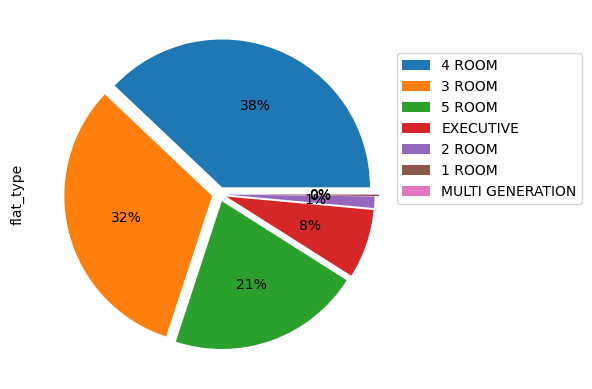

In [38]:
# Define the ratio of gap of each fragment in a tuple 
explode = (0.05, 0.05, 0.05,0.05, 0.05, 0.08,0.08) 
sales['flat_type'].value_counts().plot(kind='pie',autopct='%1.0f%%', explode=explode, labels=None)
plt.legend(sales['flat_type'].value_counts().index, loc='upper right',bbox_to_anchor=(1.5, 0.9))

1 Room and 2 Room flats only account for 0 and 1% of all flats respectively and will be later removed from the dataset when looking at flat types.

## 5.3 Distribution of remianing lease

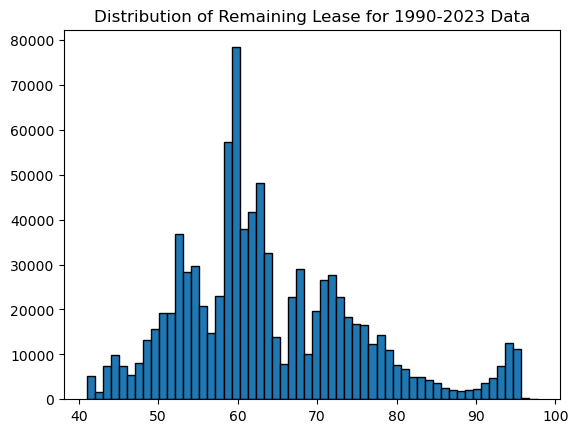

In [24]:
bins = sales['remaining_lease'].max() - sales['remaining_lease'].min()
plt.hist(sales['remaining_lease'], bins=int(bins), edgecolor='black')
plt.title('Distribution of Remaining Lease for 1990-2023 Data')
plt.show()

From this chart it is quite obvious that majority of leases left on all HDB's is 60 years which means they'll only return to the government after a period of 60 years.

## 5.4 Price since 2013 for 3,4,5 and executive flats

In [50]:
flattype = ['3 ROOM','4 ROOM','5 ROOM','EXECUTIVE']
salesbeforecovid = sales.set_index('month').sort_index().loc['2013-01':'2023-09']
salesbeforecovid = salesbeforecovid[salesbeforecovid['flat_type'].isin(flattype)][['flat_type','real_price']].reset_index()
salesbeforecovid['flat_type_year'] = salesbeforecovid['flat_type'] + ' - ' + salesbeforecovid['month'].apply(lambda x: str(x)[:4])
salesbeforecovid


,month,flat_type,real_price,flat_type_year
0,2013-01-01,5 ROOM,457136.758598,5 ROOM - 2013
1,2013-01-01,4 ROOM,458026.129724,4 ROOM - 2013
2,2013-01-01,5 ROOM,458026.129724,5 ROOM - 2013
3,2013-01-01,5 ROOM,468698.583232,5 ROOM - 2013
4,2013-01-01,5 ROOM,464251.727603,5 ROOM - 2013
...,...,...,...,...
228577,2023-09-01,5 ROOM,611631.669719,5 ROOM - 2023
228578,2023-09-01,4 ROOM,635634.656757,4 ROOM - 2023
228579,2023-09-01,5 ROOM,475614.743168,5 ROOM - 2023
228580,2023-09-01,3 ROOM,426719.769571,3 ROOM - 2023


Text(0.5, 47.7222222222222, 'Resale Price SGD ($)')

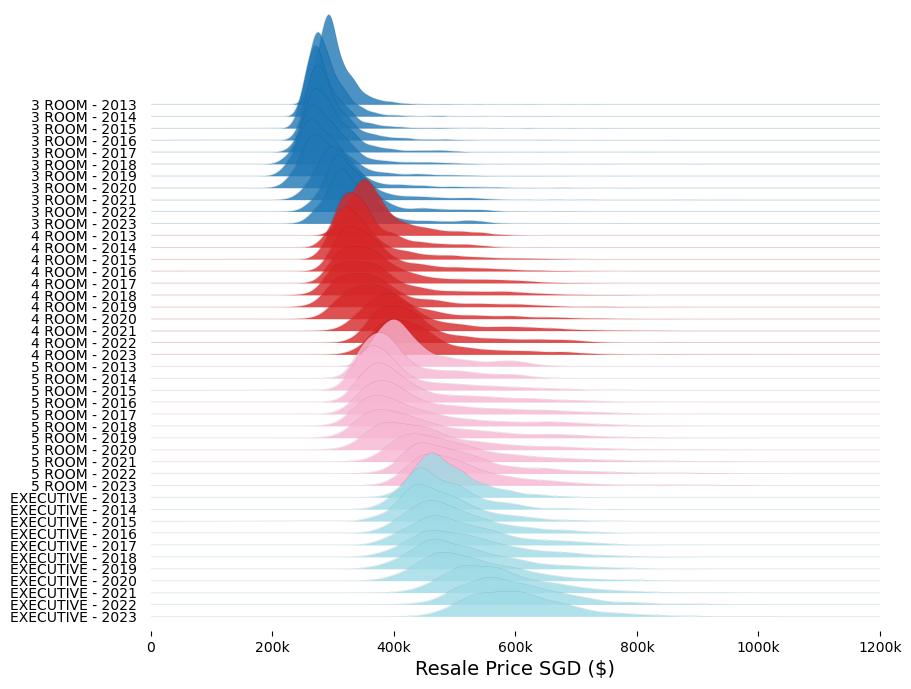

In [51]:
!pip install joypy
import joypy
fig, axes = joypy.joyplot(salesbeforecovid, by="flat_type_year", column="real_price",figsize=(9,7),
             linewidth=0.05,overlap=1.5,alpha=0.8,colormap=plt.cm.get_cmap('tab20',4))
axes[-1].set_xlim([0,1200000])
axes[-1].set_xticklabels(['0', '200k', '400k', '600k', '800k', '1000k', '1200k','1400k']) 
plt.xlabel('Resale Price SGD ($)', fontsize=14)
#fig.show()

We don't see much changes within each flat type from 2013 which  was when the most comprehensive property price cooling measures were introduced by the government. The only consistent pattern is that prices become higher as flats have more rooms, which is unsurprising. The only exception to this trend is the year 2013 which shows higher prices first, before dropping and then moving higher again, this shows the affect of the aforementioned cooling measures.

## 5.5 floor levels

In [336]:
## Extract year
sales['year'] = pd.DatetimeIndex(sales['month']).year # extract out year

C:\Users\sukho\AppData\Local\Temp\ipykernel_4616\2987028197.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)
C:\Users\sukho\AppData\Local\Temp\ipykernel_4616\2987028197.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ax1.set_xticklabels(pd.Series(['']).append(storey.iloc[[0,5,10,15,20,24],0]))
C:\Users\sukho\AppData\Local\Temp\ipykernel_4616\2987028197.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(pd.Series(['']).append(storey.iloc[[0,5,10,15,20,24],0]))
C:\Users\sukho\AppData\Local\Temp\ipykernel_4616\2987028197.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ylabels); ax2.set_ylabel('')


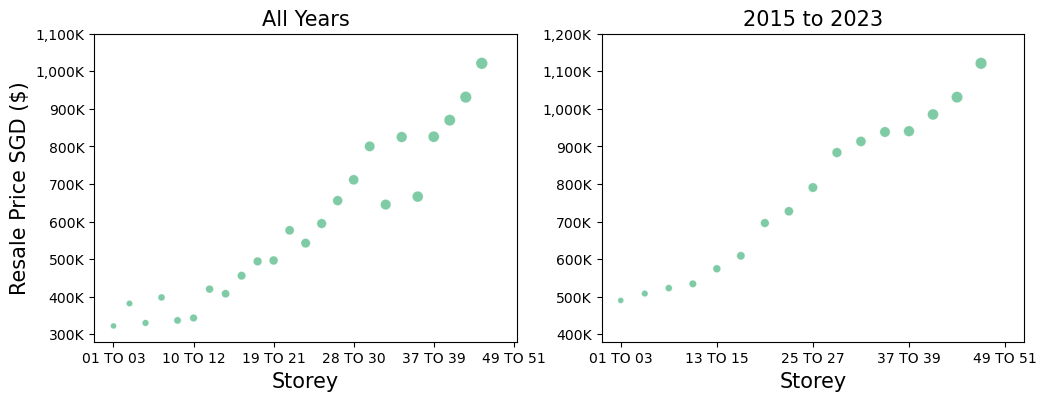

In [20]:
fig = plt.figure(figsize=(12,4))

# Storey Prices
ax1 = plt.subplot(121)
storey = sales.groupby('storey_range')['real_price'].median().reset_index().sort_values(by='storey_range')
storey['storey_rank'] = storey['storey_range'].astype('category').cat.codes # label encode
a=sns.scatterplot(x=storey['storey_rank'], y=storey['real_price'], size=storey['storey_rank'].astype('int')*30, color='#00994d', edgecolors='w', alpha=0.5, legend=False, ax=ax1)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_yticks()/1000]
ax1.set_yticklabels(ylabels)
ax1.set_xticklabels(pd.Series(['']).append(storey.iloc[[0,5,10,15,20,24],0]))
ax1.set_ylim([280000,1100000]), ax1.set_ylabel('Resale Price SGD ($)', size=15), ax1.set_xlabel('Storey', size=15)
ax1.set_title('All Years', size=15)

# Floor Area Prices
ax2 = plt.subplot(122)
storey2 = sales[sales['year'].isin([2015,2016,2017,2018,2019,2020,2021,2022,2023])].groupby('storey_range')['real_price'].median().reset_index().sort_values(by='storey_range')
storey2['storey_rank'] = storey2['storey_range'].astype('category').cat.codes

# Bubble chart
b=sns.scatterplot(x=storey2['storey_rank'], y=storey2['real_price'], size=storey2['storey_rank'].astype('int')*30, color='#00994d', edgecolors='w', alpha=0.5, legend=False, ax=ax2)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax2.get_yticks()/1000]
ax2.set_yticklabels(ylabels); ax2.set_ylabel('')
ax2.set_xticks([0,4,8,12,16])
ax2.set_xticklabels(storey2.iloc[[0,4,8,12,16],0])
ax2.set_ylim([280000,1100000]), ax2.set_xlabel('Storey', size=15)
ax2.set_title('2015 to 2023', size=15)

plt.show()

It seems price has a linear relationship with floor levels wherein the price increases steadily with an increase in floor levels.

## 5.6 floor area

C:\Users\sukho\AppData\Local\Temp\ipykernel_4616\2006889928.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


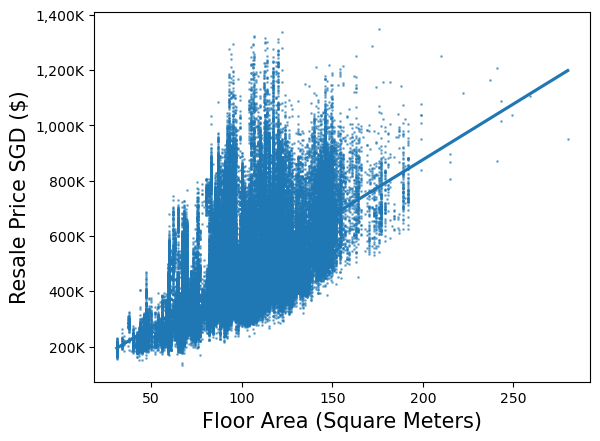

In [21]:
# Floor Area Prices
area = sales[sales['year'].isin([2015,2016,2017,2018,2019,2020,2021,2022,2023])]
p=sns.regplot(x='floor_area_sqm', y='real_price', data=area, scatter_kws={"s": 1, 'alpha':0.5})
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
p.set_xlabel('Floor Area (Square Meters)', size=15)
plt.show()

It seems the price also increases with an increase in the floor area.

## 5.7 by block number

C:\Users\sukho\AppData\Local\Temp\ipykernel_4616\3159019999.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ylabels)


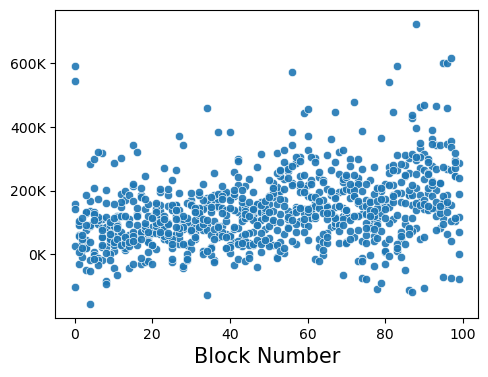

In [38]:
import re

# Block Number Prices
get_num = lambda x: int(re.findall("\d+", x)[0])
sales['blocknum'] = sales['block'].apply(get_num) # get only digits from block number
tmp = sales[sales['blocknum'] > 99] # get only blocks that use 3-digit numbering system
tmp = tmp.groupby('blocknum')['real_price'].median().reset_index()

# Scatterplots
fig = plt.figure(figsize=(12,4))
ax2 = plt.subplot(122)
b=sns.scatterplot(x=tmp['blocknum'].apply(lambda x: int(str(x)[1:])), y=tmp['real_price'], edgecolors='w', alpha=0.9)
ax2.set_yticklabels(ylabels)
ax2.set_ylabel('', size=15)
ax2.set_xlabel('Block Number', size=15)

plt.show()

There seems to be no relationship between block number and price

## 5.8 Resale price by lease

C:\Users\sukho\AppData\Local\Temp\ipykernel_4616\2055377149.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(xlabels)


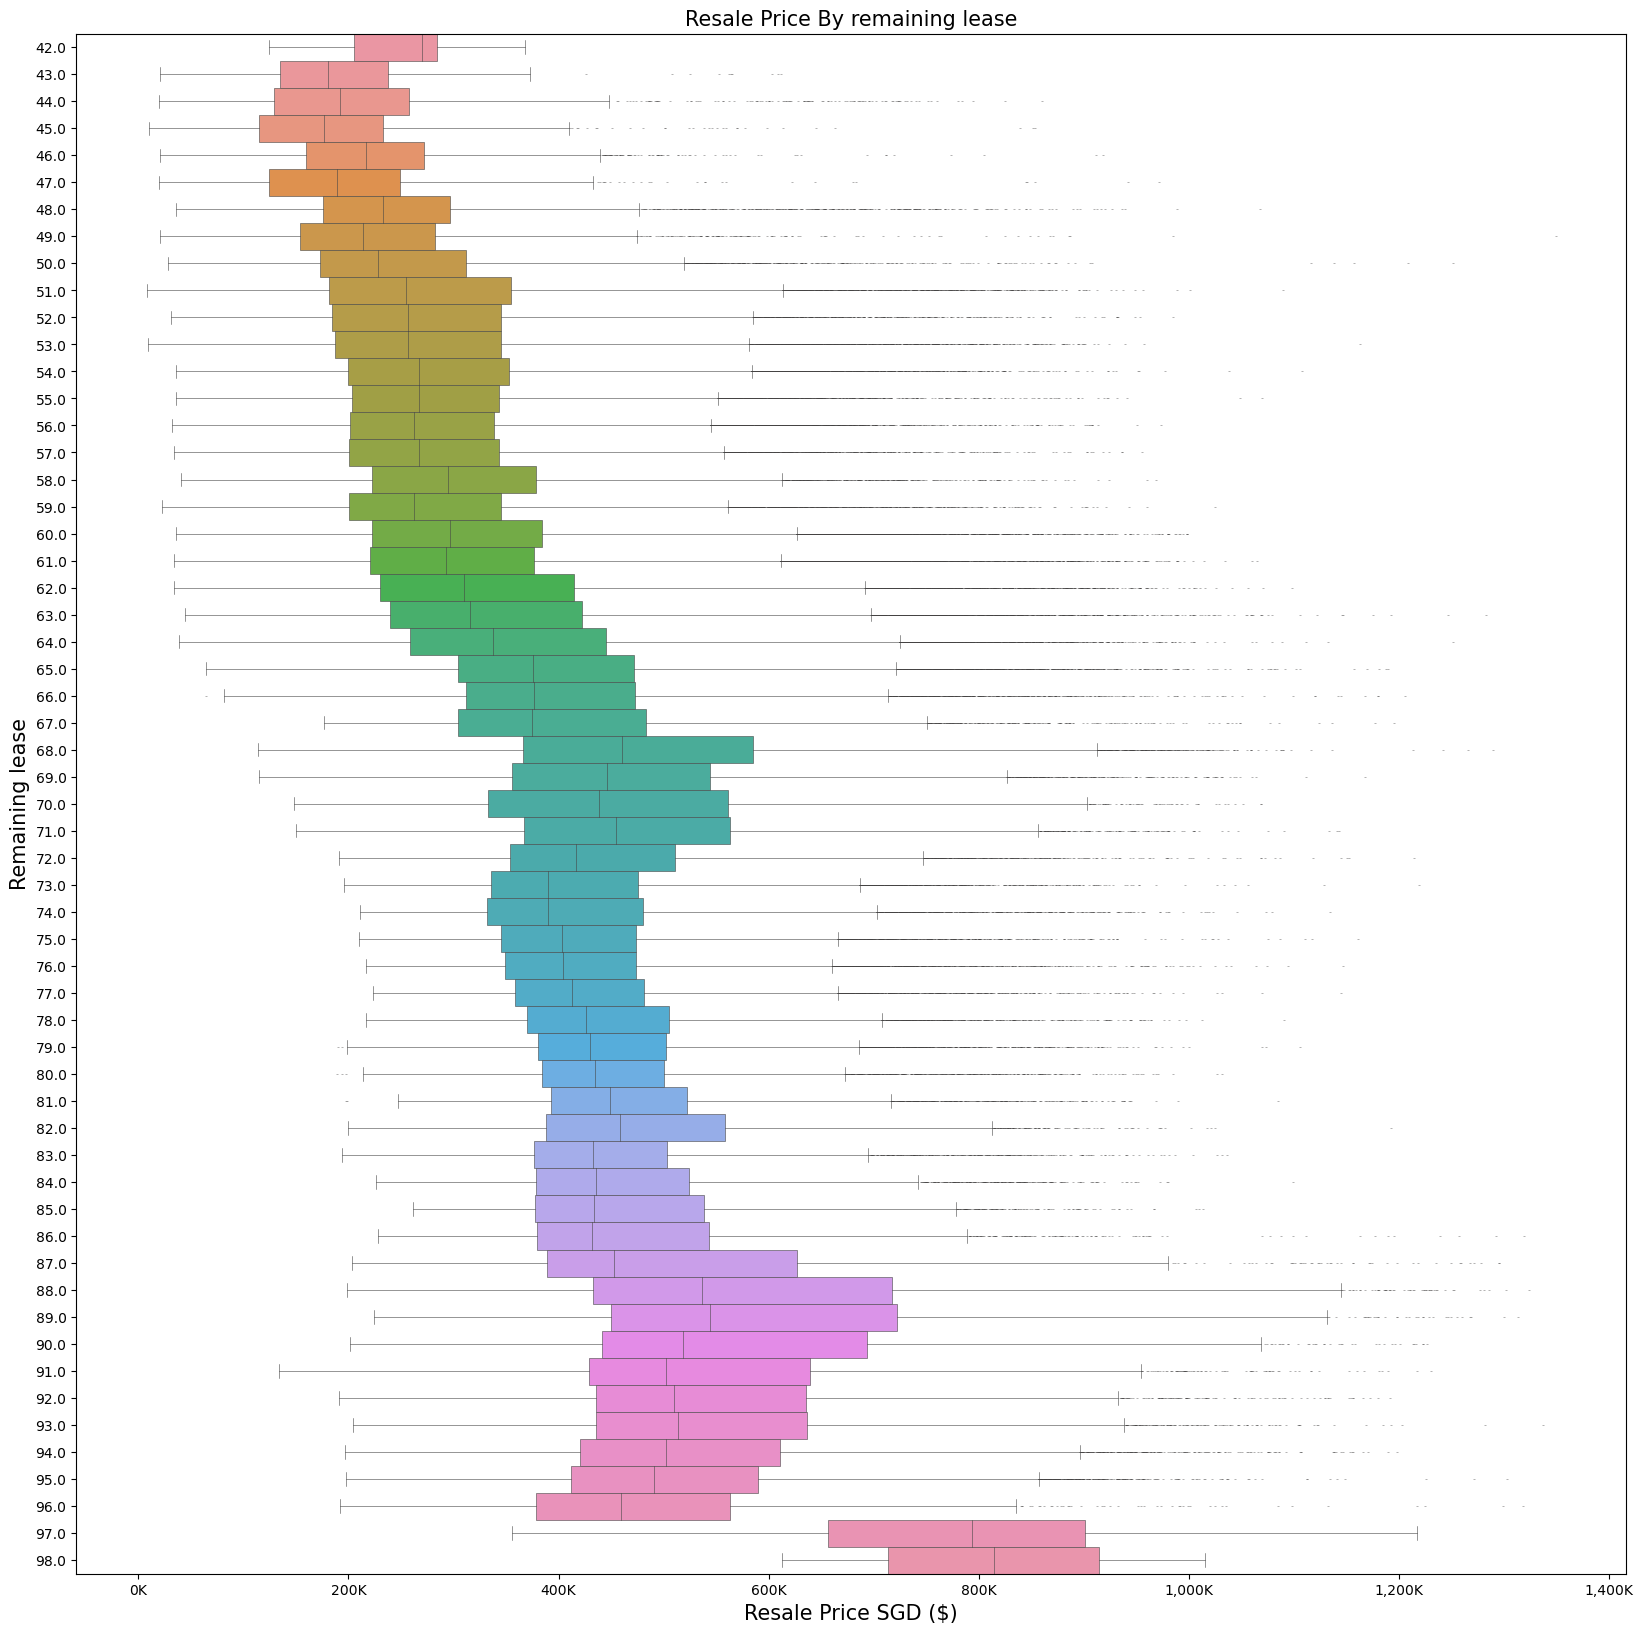

In [63]:
sales['remaining_lease'] = sales['remaining_lease'].round()
fig = plt.figure(figsize=(20,20))
p=sns.boxplot(y='remaining_lease', x='real_price', data=sales, width=1, orient='h', flierprops = dict(markerfacecolor = 'red', markersize = 0.1, linestyle='none'), linewidth=0.4)
max_value = min(sales['remaining_lease'].max(), 100)
ylabels = ['{:,.0f}'.format(y) for y in range(0, int(max_value) + 1)]

# Set y-axis ticks explicitly based on the custom labels
p.set_xlabel('Resale Price SGD ($)', size=15), p.set_ylabel('Remaining lease', size=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_xticks()/1000]
p.set_xticklabels(xlabels)
p.set_title('Resale Price By remaining lease', size=15)
plt.show()





This graph finds that the resale price of a HDB grows almost linearly with the value of the remaining lease

## 5.9 Resale price by flat model

C:\Users\sukho\AppData\Local\Temp\ipykernel_4616\2620780120.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


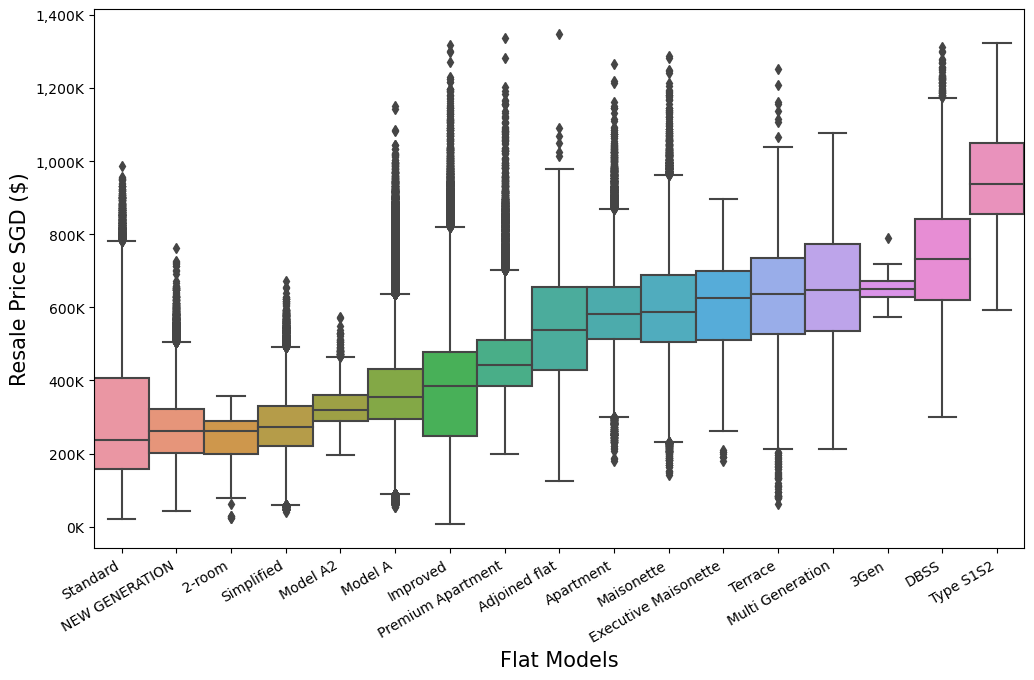

In [41]:
# box plots for price distribution of each flat model

fig = plt.figure(figsize=(12,7))
p=sns.boxplot(x='flat_model', y='real_price', data=sales, width=1,
                order=sales.groupby('flat_model')['real_price'].median().sort_values().reset_index()['flat_model'].tolist())
p.set_xticklabels(p.get_xticklabels(), rotation=30, ha='right'), p.set_xlabel('Flat Models', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
plt.show()

The type of apartment also seems to significantly affect the price of a HDB

## 5.10 Resale price by town

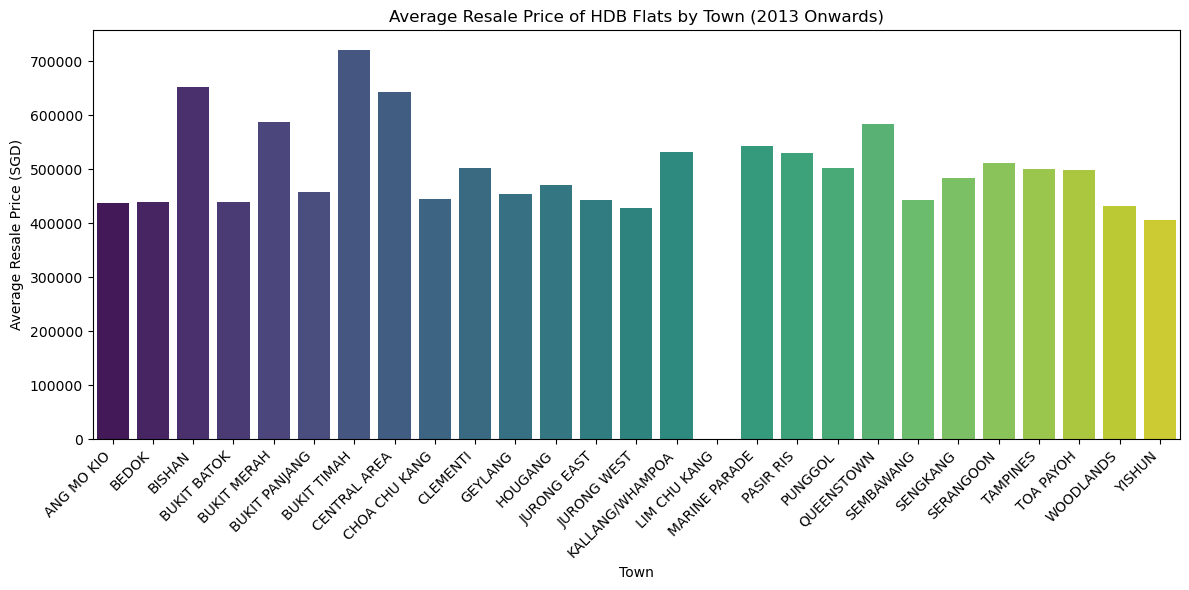

In [181]:
#getting sales data for all towns
sales_recent = sales[sales['year'].isin([2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023])]

# Calculate the average resale price for each town
average_prices = sales_recent.groupby('town')['resale_price'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=average_prices.index, y=average_prices.values, palette='viridis')
plt.title('Average Resale Price of HDB Flats by Town (2013 Onwards)')
plt.xlabel('Town')
plt.ylabel('Average Resale Price (SGD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The above data shows prices by neighbourhoods known as "towns" in singapore, curiously enough the "town" Lim Chu Kang has no data, upon further research it was found that Lim Chu Kang was cleared of all residential spaces so that it could be used as a military training ground by 2002, hence why there are no HDB sales recorded in this graph which is from 2013

# 6 Feature selection

In [337]:

sales=sales.drop(['month','block','street_name','cpi','lease_commence_date','resale_price'],axis=1)
sales_recent=sales[sales['year'].isin([2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023])]
sales_recent = sales_recent.dropna()
sales_recent

,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,real_price,year
676857,ANG MO KIO,2 ROOM,01 TO 03,44.0,Improved,55.000000,225010.894796,2013
676858,ANG MO KIO,2 ROOM,01 TO 03,44.0,Improved,53.000000,240130.203933,2013
676859,ANG MO KIO,2 ROOM,04 TO 06,44.0,Improved,52.000000,251692.028567,2013
676860,ANG MO KIO,3 ROOM,07 TO 09,61.0,Improved,61.000000,271258.193331,2013
676861,ANG MO KIO,3 ROOM,01 TO 03,60.0,Improved,61.000000,284598.760217,2013
...,...,...,...,...,...,...,...,...
913855,YISHUN,EXECUTIVE,01 TO 03,154.0,Maisonette,63.500000,747493.327563,2023
913856,YISHUN,EXECUTIVE,07 TO 09,146.0,Maisonette,63.500000,770937.026618,2023
913857,YISHUN,EXECUTIVE,01 TO 03,146.0,Maisonette,63.583333,780300.143357,2023
913859,YISHUN,MULTI GENERATION,07 TO 09,179.0,Multi Generation,63.916667,995501.806651,2023


From the above analysis of the dataset, the below features were removed:
1. month( does not affect prices)
2. block(does not affect prices)
3. street_name(does ot affect prices)
4. CPI( CPI has already used inflation data to calculate real price)
5. lease_commence_date (we will use reamining_lease instead)
6. resale_price ( we already have real price which is inflation adjusted resale price)

# 6 Machine learning model

In [338]:
sample_df = sales_recent.sample(frac=0.1, random_state=42)
sample_df

,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,real_price,year
892798,BUKIT BATOK,4 ROOM,07 TO 09,84.0,Simplified,62.583333,401247.926134,2023
849894,WOODLANDS,4 ROOM,10 TO 12,104.0,Model A,72.000000,409291.924970,2021
718548,KALLANG/WHAMPOA,5 ROOM,07 TO 09,131.0,Improved,69.000000,691327.071446,2015
769959,PASIR RIS,4 ROOM,10 TO 12,108.0,Model A,77.666667,414364.640884,2018
823058,PUNGGOL,5 ROOM,01 TO 03,113.0,Premium Apartment,95.083333,625945.177218,2020
...,...,...,...,...,...,...,...,...
717715,ANG MO KIO,3 ROOM,01 TO 03,68.0,NEW GENERATION,68.000000,276530.828579,2015
789926,BEDOK,4 ROOM,01 TO 03,82.0,Improved,55.916667,336863.798040,2019
820116,HOUGANG,5 ROOM,04 TO 06,140.0,Maisonette,63.000000,712352.186921,2020
691688,TAMPINES,5 ROOM,01 TO 03,125.0,Improved,68.000000,444529.670176,2013


In [339]:
x = sample_df.drop('real_price', axis=1)
y = sample_df['real_price']

In [257]:
# Import neccessary library to evaluate the performance of each machine learning model
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [340]:
num_cols = x.select_dtypes(['float64','int64']).columns
cat_cols = x.select_dtypes(['category','object']).columns

In [341]:
#train, test, validation split
seed_number = 42

from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(x, y ,
                                                    test_size = 0.2, 
                                                    shuffle = True,
                                                   random_state = seed_number)

In [342]:
#train, test, validation split
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp ,
                                                    test_size = 0.5, 
                                                    shuffle = True,
                                                   random_state = seed_number)

In [261]:
print('Shapes')
print('X_train.shape \t' , X_train.shape)
print('X_val.shape \t' , X_val.shape)
print('X_test.shape \t' , X_test.shape)
print('y_train.shape \t' , y_train.shape)
print('y_val.shape \t' , y_val.shape)
print('y_test.shape \t' , y_test.shape)

Shapes
X_train.shape 	 (18960, 7)
X_val.shape 	 (2370, 7)
X_test.shape 	 (2370, 7)
y_train.shape 	 (18960,)
y_val.shape 	 (2370,)
y_test.shape 	 (2370,)


In [343]:
X_train.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,year
902839,PUNGGOL,4 ROOM,13 TO 15,93.0,Premium Apartment,86.083333,2023
791598,CHOA CHU KANG,4 ROOM,07 TO 09,106.0,Model A,69.000000,2019
785986,PUNGGOL,4 ROOM,07 TO 09,92.0,Premium Apartment,89.333333,2018
817779,JURONG EAST,5 ROOM,04 TO 06,135.0,Model A,63.583333,2020
710815,JURONG WEST,3 ROOM,10 TO 12,73.0,Model A,68.000000,2015


In [344]:
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , OneHotEncoder , PolynomialFeatures
from sklearn.compose import ColumnTransformer

# Scale numerical variables

num_pipeline = Pipeline([
    ('ss', StandardScaler()),
    ('poly', PolynomialFeatures())
])

# One hot encoding categorical variables

cat_pipline = Pipeline([
    ('ohe', OneHotEncoder(drop = 'first'))
])

preprocess = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipline, cat_cols)
])

1. Numerical Pipeline (num_pipeline):

StandardScaler ('ss'): Standardizes numerical features by removing the mean and scaling to unit variance. It helps ensure that numerical features are on a similar scale, which is often important for machine learning algorithms.

PolynomialFeatures ('poly'): Generates polynomial features up to a specified degree. This is useful for capturing non-linear relationships between features.

2. Categorical Pipeline (cat_pipeline):

 OneHotEncoder ('ohe'): Encodes categorical features using one-hot encoding. It creates binary columns for each category, representing the presence or absence of that category. The drop='first' parameter is used to avoid the "dummy variable trap" by dropping the first encoded column for each categorical feature.
 
3. ColumnTransformer (preprocess):

('num', num_pipeline, num_cols): Applies the num_pipeline to the columns specified in num_cols, which are assumed to be numerical features.

('cat', cat_pipeline, cat_cols): Applies the cat_pipeline to the columns specified in cat_cols, which are assumed to be categorical features.

By combining these pipelines in a ColumnTransformer, I can apply different preprocessing steps to different subsets of columns in my dataset. 

In [345]:
X_train_preprocessed = preprocess.fit_transform(X_train)

In [346]:
X_val_preprocessed = preprocess.transform(X_val)

In [347]:
X_train_preprocessed.shape

(18749, 73)

In [348]:
X_train_preprocessed[:10]

<10x73 sparse matrix of type '<class 'numpy.float64'>'
	with 140 stored elements in Compressed Sparse Row format>

In [349]:
def plot_results(score, title):
    
    train_score = score['train_score']
    test_score = score['test_score']
    
    train_score = (-train_score)**(1/2) 
    test_score = (-test_score)**(1/2)
    
    cv = len(score['score_time'])
    
    fig, ax = plt.subplots(figsize = (5,5))
    
    ax.plot(range(cv), train_score, 'r-', label = 'Training RMSE')
    ax.plot(range(cv), test_score, 'b--', label = 'Validation RMSE')
    ax.set_title(title)
    ax.set_xlabel('K-Folds')
    ax.set_ylabel('Error')
    ax.legend()
    plt.show()

In [299]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
model_list = {'Linear Regression':LinearRegression()
             }

In [350]:
def plot_results_wtrain(score, title):
    
    train_score = score['train_score']
    test_score = score['test_score']
    
    train_score = (-train_score)**(1/2) 
    test_score = (-test_score)**(1/2)
    
    cv = len(score['score_time'])
    
    plt.plot(range(cv), train_score, 'r-', label = 'Training RMSE')
    plt.plot(range(cv), test_score, 'b--', label = 'Validation RMSE')
    plt.title(title)
    plt.xlabel('K-Folds')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

In [301]:
from sklearn.model_selection import cross_validate

Model is  Linear Regression
 
Mean Train RMSE 51144.12598386911
Train RMSE  [-2513969578.6646276, -2777302163.6534176, -2391569563.3161426, -2683772681.847626, -2721937982.6742086]
 
Mean Val RMSE  66042.9062663583
Val RMSE  [-5737001625.843629, -3505359305.92523, -5839468966.134363, -3728426125.910495, -3339476232.8141203]


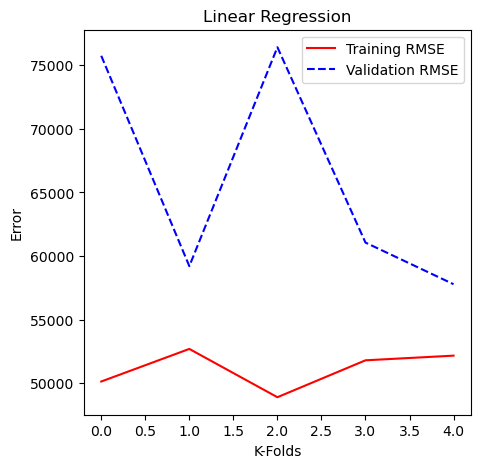

In [351]:
cv = 5
training_samples = 500

train_rmse_list = []
val_rmse_list = []

for name , model in model_list.items():
    model_instance = model.fit(X_train_preprocessed[:training_samples], y_train[:training_samples])
    
    model_cv_score = cross_validate(model_instance,X_train_preprocessed[:training_samples], y_train[:training_samples], scoring = 'neg_mean_squared_error', cv=cv, n_jobs = -1,return_train_score= True )
    
    train_rmse_list.append(model_cv_score['train_score'])
    val_rmse_list.append(model_cv_score['test_score'])
    
    print('Model is ', name)
    print(" ")
    print('Mean Train RMSE', ((-model_cv_score['train_score'])**(1/2)).mean())
    print('Train RMSE ', list(model_cv_score['train_score']))
    print(" ")
    print('Mean Val RMSE ' , ((-model_cv_score['test_score'])**(1/2)).mean())
    print('Val RMSE ' , list(model_cv_score['test_score']))
    plot_results(model_cv_score, name)


In [352]:
cv = 10
training_samples = 400

train_mse_list = []
val_mse_list = []
train_r2_list = []
val_r2_list = []

for name, model in model_list.items():
    model_instance = model.fit(X_train_preprocessed[:training_samples], y_train[:training_samples])
    
    model_cv_score = cross_validate(
        model_instance,
        X_train_preprocessed[:training_samples],
        y_train[:training_samples],
        scoring={'mse': 'neg_mean_squared_error', 'r2': 'r2'},
        cv=cv,
        n_jobs=-1,
        return_train_score=True
    )
    
    train_mse_list.append(-model_cv_score['train_mse'])
    val_mse_list.append(-model_cv_score['test_mse'])
    
    train_r2_list.append(model_cv_score['train_r2'])
    val_r2_list.append(model_cv_score['test_r2'])
    print(f'Model: {name}')
    print(f'Mean Train MSE: {train_mse_list[-1].mean():.4f}')
    print(" ")
    print(f'Train MSE: {list(train_mse_list[-1])}')
    print(" ")
    print(f'Mean Train R-squared: {train_r2_list[-1].mean():.4f}')
    print(" ")
    print(f'Train R-squared: {list(train_r2_list[-1])}')
    print(" ")
    print(f'Mean Val MSE: {val_mse_list[-1].mean():.4f}')
    print(" ")
    print(f'Val MSE: {list(val_mse_list[-1])}')
    print(" ")
    print(f'Mean Val R-squared: {val_r2_list[-1].mean():.4f}')
    print(" ")
    print(f'Val R-squared: {list(val_r2_list[-1])}\n')
    



Model: Linear Regression
Mean Train MSE: 2663254583.6098
 
Train MSE: [2562763298.4250765, 2504644367.641727, 2745042723.1267385, 2793906905.5650783, 2763866223.80187, 2622580621.8158045, 2486708821.782787, 2697879747.062031, 2728177240.891959, 2726975885.9845843]
 
Mean Train R-squared: 0.9003
 
Train R-squared: [0.902706967913093, 0.8954508532975582, 0.8922071202518613, 0.9013681894922417, 0.8998864403875411, 0.90158986632979, 0.9042302109317653, 0.9020853177622006, 0.900730859657675, 0.9022446105741261]
 
Mean Val MSE: 4871523825.8942
 
Val MSE: [5681244074.956373, 6619654746.640712, 2999259159.4853783, 2446089192.031878, 4322933591.356156, 6018917441.9369545, 9651057372.465542, 3679207995.6684294, 3887896328.5670114, 3408978355.8338423]
 
Mean Val R-squared: 0.8001
 
Val R-squared: [0.808804602355714, 0.8643199359129804, 0.921282002548906, 0.7574783382438713, 0.7624762657732931, 0.7810067099212503, 0.7131120118739867, 0.8016537540562438, 0.8023891978631095, 0.788555885134051]



Training Set:

Mean Train MSE: 2,663,254,583.61
Mean Train R-squared: 0.9003
The model appears to perform well on the training set, with a high R-squared value indicating that around 90.03% of the variance in the target variable is explained by the model.

Validation Set:

Mean Validation MSE: 4,871,523,825.89
Mean Validation R-squared: 0.8001
On the validation set, the mean MSE is higher compared to the training set, suggesting that the model might not generalize as well to unseen data. However, the R-squared value of 0.8001 still indicates a reasonably good fit.

It's essential to consider the application and context of your model when evaluating its performance. In some cases, achieving a high R-squared on the training set might lead to overfitting. 

# 7 Feature engineering

In [355]:
#Engineering flat_type and storey_range
engineered_salesFinal=sales_recent
engineered_salesFinal['flat_type'] = engineered_salesFinal['flat_type'].str.replace(r'EXECUTIVE','6 ROOM',regex=True)
engineered_salesFinal['flat_type'] = engineered_salesFinal['flat_type'].str.replace(r'MULTI GENERATION','5 ROOM',regex=True)
engineered_salesFinal['flat_type'] = engineered_salesFinal['flat_type'].str.replace(r'ROOM','',regex=True).astype('int')
# I assume that rather we use floor range, I the possible highest floor within the unit storey range.
engineered_salesFinal['storey'] = engineered_salesFinal['storey_range'].str[-2:].astype('int')

I feature engineered the flat_type to indicate numerically the number of rooms rather than categorically and I engineered a new column storey from storey_range to have a numerical value that corresponds to the upper bound of the storey range.

In [358]:
df = engineered_salesFinal.sample(frac=0.1, random_state=42)
df

,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,real_price,year,storey
892798,BUKIT BATOK,4,07 TO 09,84.0,Simplified,62.583333,401247.926134,2023,9
849894,WOODLANDS,4,10 TO 12,104.0,Model A,72.000000,409291.924970,2021,12
718548,KALLANG/WHAMPOA,5,07 TO 09,131.0,Improved,69.000000,691327.071446,2015,9
769959,PASIR RIS,4,10 TO 12,108.0,Model A,77.666667,414364.640884,2018,12
823058,PUNGGOL,5,01 TO 03,113.0,Premium Apartment,95.083333,625945.177218,2020,3
...,...,...,...,...,...,...,...,...,...
717715,ANG MO KIO,3,01 TO 03,68.0,NEW GENERATION,68.000000,276530.828579,2015,3
789926,BEDOK,4,01 TO 03,82.0,Improved,55.916667,336863.798040,2019,3
820116,HOUGANG,5,04 TO 06,140.0,Maisonette,63.000000,712352.186921,2020,6
691688,TAMPINES,5,01 TO 03,125.0,Improved,68.000000,444529.670176,2013,3


In [359]:
x = df.drop('real_price', axis=1)

In [360]:
num_cols = x.select_dtypes(['float64','int64']).columns
cat_cols = x.select_dtypes(['category','object']).columns

In [361]:
seed_number = 42

from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(x, y ,
                                                    test_size = 0.2, 
                                                    shuffle = True,
                                                   random_state = seed_number)

In [362]:
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp ,
                                                    test_size = 0.5, 
                                                    shuffle = True,
                                                   random_state = seed_number)

In [363]:
# Scale numerical variables

num_pipeline = Pipeline([
    ('ss', StandardScaler()),
    ('poly', PolynomialFeatures())
])

# One hot encoding categorical variables

cat_pipline = Pipeline([
    ('ohe', OneHotEncoder(drop = 'first'))
])

preprocess = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipline, cat_cols)
])

In [364]:
X_train_preprocessed = preprocess.fit_transform(X_train)
X_val_preprocessed = preprocess.transform(X_val)

In [365]:
cv = 10
training_samples = 400

train_mse_list = []
val_mse_list = []
train_r2_list = []
val_r2_list = []

for name, model in model_list.items():
    model_instance = model.fit(X_train_preprocessed[:training_samples], y_train[:training_samples])
    
    model_cv_score = cross_validate(
        model_instance,
        X_train_preprocessed[:training_samples],
        y_train[:training_samples],
        scoring={'mse': 'neg_mean_squared_error', 'r2': 'r2'},
        cv=cv,
        n_jobs=-1,
        return_train_score=True
    )
    
    train_mse_list.append(-model_cv_score['train_mse'])
    val_mse_list.append(-model_cv_score['test_mse'])
    
    train_r2_list.append(model_cv_score['train_r2'])
    val_r2_list.append(model_cv_score['test_r2'])
    print(f'Model: {name}')
    print(f'Mean Train MSE: {train_mse_list[-1].mean():.4f}')
    print(" ")
    print(f'Train MSE: {list(train_mse_list[-1])}')
    print(" ")
    print(f'Mean Train R-squared: {train_r2_list[-1].mean():.4f}')
    print(" ")
    print(f'Train R-squared: {list(train_r2_list[-1])}')
    print(" ")
    print(f'Mean Val MSE: {val_mse_list[-1].mean():.4f}')
    print(" ")
    print(f'Val MSE: {list(val_mse_list[-1])}')
    print(" ")
    print(f'Mean Val R-squared: {val_r2_list[-1].mean():.4f}')
    print(" ")
    print(f'Val R-squared: {list(val_r2_list[-1])}\n')
    


Model: Linear Regression
Mean Train MSE: 2733920795.5007
 
Train MSE: [2612754760.025344, 2586077524.370733, 2812275084.848084, 2886422934.107904, 2821113304.248387, 2678686597.695412, 2561200287.561828, 2770691183.35261, 2804403300.0535264, 2805582978.742851]
 
Mean Train R-squared: 0.8976
 
Train R-squared: [0.9008090864815401, 0.8920516613167343, 0.8895670265946094, 0.8981021453094558, 0.8978128201263411, 0.8994845367395077, 0.9013613459072193, 0.8994427579314914, 0.8979572512383854, 0.8994267393183831]
 
Mean Val MSE: 4819844460.3061
 
Val MSE: [5983281127.069061, 6655310812.134144, 3026091613.0790577, 2281883419.3406205, 4054658891.334245, 6084728259.779846, 9332525920.047745, 3635532852.264238, 3813046364.6302705, 3331385343.382264]
 
Mean Val R-squared: 0.8039
 
Val R-squared: [0.7986399106930985, 0.8635891096937285, 0.9205777629679702, 0.773758798086774, 0.7772166283537333, 0.7786122382141338, 0.7225806995019053, 0.8040082827334687, 0.8061936103688586, 0.7933686425425952]



Mean Train MSE: Increased from approximately 2,663,254,583.61 to 2,733,920,795.50.
Mean Train R-squared: Slightly decreased from 0.9003 to 0.8976.
Validation Set:

Mean Validation MSE: Decreased from around 4,871,523,825.89 to 4,819,844,460.31.
Mean Validation R-squared: Slightly increased from 0.8001 to 0.8039.
The mean validation MSE has decreased slightly, indicating potential improvement in generalization to new data. The mean train MSE has increased, which might suggest a trade-off between overfitting to the training set and capturing patterns in the validation set. R-squared values, which indicate the proportion of variance explained by the model, have also shown slight changes.

# 8 Conclusion

This project aimed to find trends in HDB resale prices and then use machine learning to leverage its predictive capability in order to predict the price of HDB's, we compared the sale price of the HDB to every available feature in the dataset and determined which features greatly affected it, I then followed up by inputting the features that affected the price into a machine learning model that utilised linear regression in order to predict the price of resale HDBs.

This model was moderately successful. This success was measured with metrics such as Mean Squared Error (MSE) , Root Mean Squared Error (RMSE) and R square values.The model was first run and gave a R square value of 0.801. I then feature engineered the input dataframe and again inputted the values into a linear regression model to obtain a new R square value of 0.8039. an imporovement over the last model.

The contributions of this project is essentially two fold:
1. This project offers insights on what features greatly affect the price of a resale HDB and subsequently may aid in suggesting ways to bring this price down.

2. The findings from this project can also be applied to housing in different cities and can help predict prices there too.

I believe this project has succeeded in all of its objectives and provided a satisfactory result.
References:
https://www.kaggle.com/code/misterkix/prediction-of-singapore-hdb-price-machine-learning/notebook#Machine-Learning-Models-(Regression)
https://www.kaggle.com/code/davegn/prediction-of-resale-hdb-prices-regression-model
https://www.kaggle.com/code/chngyuanlongrandy/hdb-resale-prices/notebook